<a href="https://colab.research.google.com/github/pemooney1/Data-Science-Projects/blob/main/MooneyPeter_E_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-news Express Project Case

## Define Problem Statement and Objectives

E-news is an online electronic news website that offers updates on day-to-day events ocurring across the globe.

One of their subdivisions, E-news Express, is looking to expand its business by acquiring new subscribers. There has been a decline in customer acquisition and the executive team believes this is because the webpage is not optimized to keep customers engaged.

As a result, the design team has created a new landing page and wants to test the effectiveness of this new webpage to acquire new customers.

The Data Science team has been tasked to test this. To do so, we have randomly sampled 100 users and divided them into equal parts and collected the data regarding their interactions with the landing page.

With this in mind, we're looking to answer four main questions:



1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?



## Import all the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [ ]:
# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.2'

In [ ]:
# if the scipy version is lower than 1.6.1, then uncomment the below code to update the scipy package.
#!pip install --upgrade scipy

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/PGP-DS_UT/2-Business Statistics/Project 2/abtest.csv')
# returns the first 5 rows
df = df_original.copy()
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

In [ ]:
#now, we'll look at the first few rows and last rows to validate the data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#we can see that user_id is labeled as an integer. However, it's more of an identifier than it is a numerical trait. Thus, we'll convert it to an object

df['user_id'] = df['user_id'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    object 
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [ ]:
#now we will check whether there's missing data in our dataset
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There appear to be no missing values, so we won't be needing to handle missing data or impute it

In [ ]:
#I am also checking to make sure there are no duplicate users, as this might present a data error and skew our dataset
unique_users = df['user_id'].nunique()
total_users = df['user_id'].count()

duplicates = total_users - unique_users
duplicates

0

There are no duplicate users, hence we can proceed with our data analysis

### Univariate Analysis

It appears that most of these attributes are categorical variables, with the exception of time spent on page. So let's perform some data visualization to get a better understanding of how it's distributed.

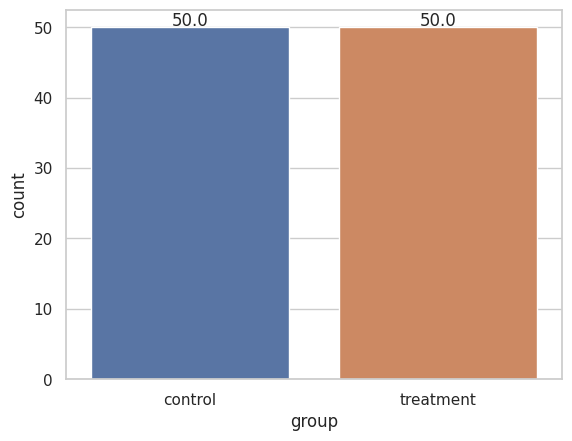

In [ ]:
#first lets see what the distribution split is for the data
df.groupby('group')['group'].count()
ax = sns.countplot(data=df, x='group')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center')

We appear to have a 50/50 split of the data. So now, lets see how many received the new or old landing page. It should match the 50/50 split, as that's what we're looking to control.

In [ ]:
df.groupby(['landing_page'])['landing_page'].count()

landing_page
new    50
old    50
Name: landing_page, dtype: int64

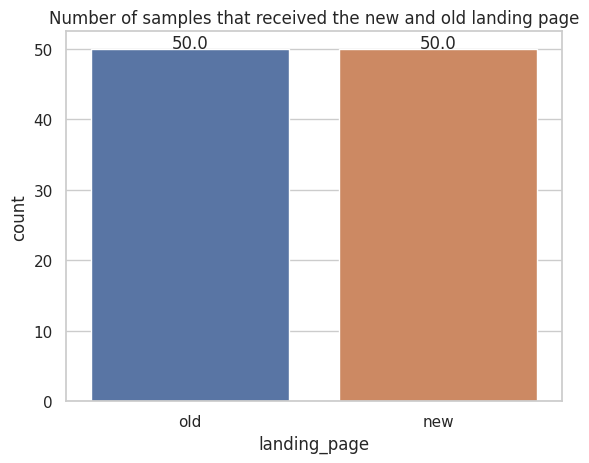

In [ ]:
plt.title('Number of samples that received the new and old landing page')
ax = sns.countplot(data=df, x='landing_page')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center')

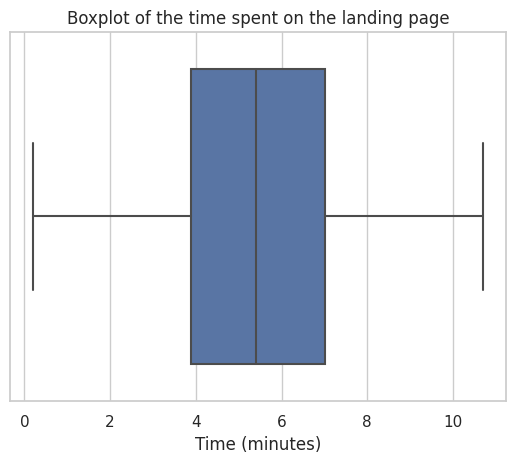

In [ ]:
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.xlabel('Time (minutes)')
plt.title('Boxplot of the time spent on the landing page')
sns.set(style="whitegrid");

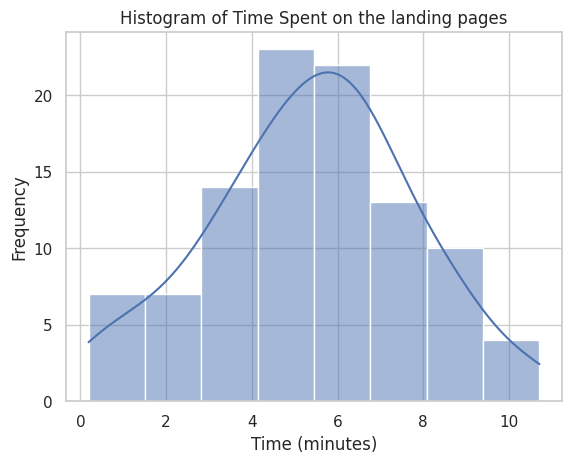

In [ ]:
#creating a histogram of food preparation times
sns.histplot(data=df,x='time_spent_on_the_page', kde=True, bins = 8)
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent on the landing pages')

# Show the plot
plt.show()

In [ ]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

We can see that the distribution of time spent on the page has quite the variance. From a max time of 10 mninutes to an average of 5 and even someone who spent less than a minute on the page. The distribution in time spent on landing pages appears to resemble a normal distribution.

In [ ]:
#let's look at how many converted and what languages they preferred
df.groupby('converted')['converted'].count()

converted
no     46
yes    54
Name: converted, dtype: int64

In [ ]:
#we can also look at the distribution of the sample data by preferred language.
df.groupby('language_preferred')['language_preferred'].count()

language_preferred
English    32
French     34
Spanish    34
Name: language_preferred, dtype: int64

There seems to be an even distribution as to the preferred language between Spanish, French, and English. In addition, the conversion rate resembles a close 50/50 split. However, this is looking at the data at an aggregate level and would need to analyze it at a landing page level.

### Bivariate Analysis

Let's look at some preliminary relationships between feautres.

In [ ]:
#firstly, we'll look at what is understood as a control and treat group in terms of the landing page
df.groupby(['group','landing_page'])['landing_page'].count()

group      landing_page
control    old             50
treatment  new             50
Name: landing_page, dtype: int64

It appears that the control group is defined as the old landing page and the treatment group as the new landing page. This makes sense in the business context, as that what we're trying to observe with his new landing page.

In [ ]:
#let's look at a higher level whether more people converted with the new landing page
df_plot = df.groupby(['landing_page', 'converted']).size().reset_index().pivot(columns='landing_page', index='converted', values=0)
df_plot

landing_page,new,old
converted,,
no,17,29
yes,33,21


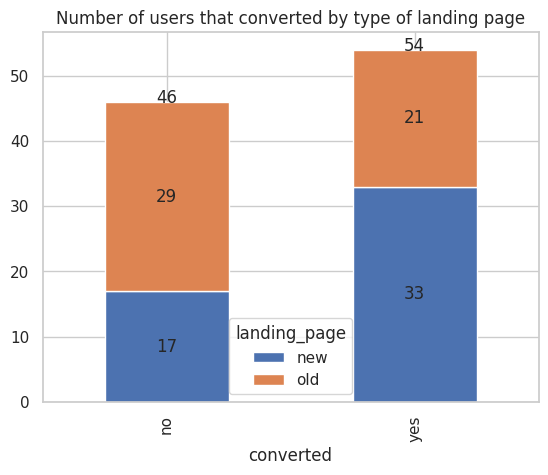

In [ ]:
# Create a stacked bar plot from the pivot table
ax = df_plot.plot(kind='bar', stacked=True)
plt.title('Number of users that converted by type of landing page')

# Add data labels to each segment of the stacked bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

#adding the toal count for the conversion rate
for i, total in enumerate(df_plot.sum(axis=1)):
    ax.text(i, total + 2, str(total), ha='center', va='top')


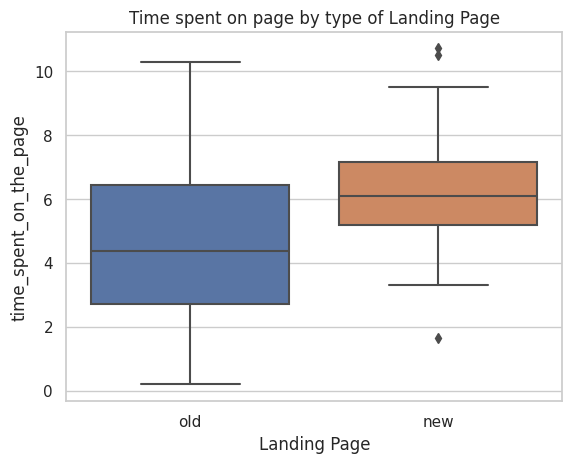

In [ ]:
#let's look at the distirbution of time spent on page by landing page
plt.title('Time spent on page by type of Landing Page')

sns.boxplot(data=df, y ='time_spent_on_the_page',x = 'landing_page')
plt.xlabel('Landing Page');

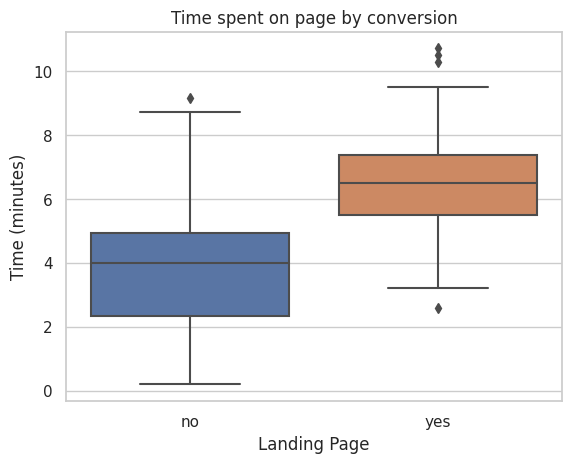

In [ ]:
#let's look at the distirbution of time spent on page by conversion rate
plt.title('Time spent on page by conversion')

sns.boxplot(data=df, y ='time_spent_on_the_page',x = 'converted')
plt.xlabel('Landing Page')
plt.ylabel('Time (minutes)');

At first sight, it looks like users that spend a longer time looking at the landing page tend to have a higher chance of converting

In [ ]:
#we can also look at the conversion rate by language as follows
#let's look at a higher level whether more people converted with the new landing page
df_plot_language = df.groupby(['language_preferred', 'converted']).size().reset_index().pivot(columns='language_preferred', index='converted', values=0)
df_plot_language

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


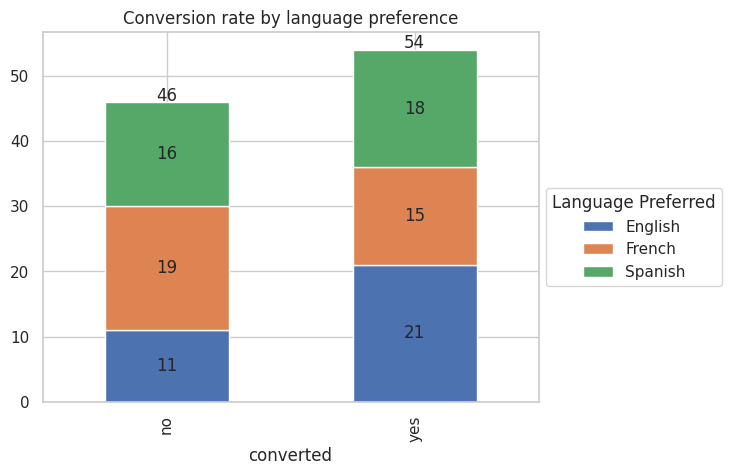

In [ ]:
# Create a stacked bar plot from the pivot table
ax_language = df_plot_language.plot(kind='bar', stacked=True)

plt.legend(loc='upper left',  bbox_to_anchor=(1, .6), title = 'Language Preferred')
plt.title('Conversion rate by language preference')

# Add data labels to each language of the stacked bars
for container in ax_language.containers:
    ax_language.bar_label(container, label_type='center')

#adding the toal count for the conversion rate
for i, total in enumerate(df_plot_language.sum(axis=1)):
    ax_language.text(i, total+1, str(total), ha='center', va='center')


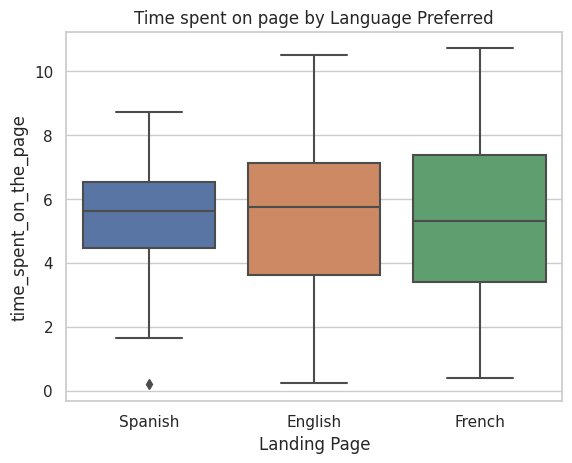

In [ ]:
#let's look at the time spent on both landing pages by language preference
plt.title('Time spent on page by Language Preferred')

sns.boxplot(data=df, y ='time_spent_on_the_page',x = 'language_preferred')
plt.xlabel('Landing Page');

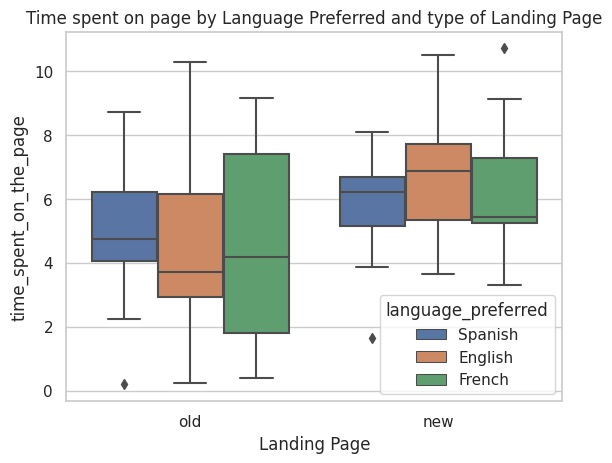

In [ ]:
#finally, I want to see whether the time spent changes by language and type of landing page
plt.title('Time spent on page by Language Preferred and type of Landing Page')

sns.boxplot(data=df, y ='time_spent_on_the_page',x = 'landing_page', hue = 'language_preferred')
plt.xlabel('Landing Page');

This goes in line with our previous preliminary hypothesis that users spent more time on the new landing page, but when looking at it from a language preferred perspective, we don't see much variability. Particularly, users spent the least time looking at the new landing page in French compared the other languages.

With this preliminary analyses in mind, there are a few insights that come to mind:


*   Users spent more time on the new landing page
*   Conversion rates were higher for the new landing page vs the old one
*   At a high level, there appears to be no significant change in conversion rates between landing pages across the language preference.
*   However, when separating between type of landing pages, those in English had the highest conversion rate compared to Spanish and French

As these are preliminary assumptions, we'll conduct statistical test to see whether these relationships hold.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

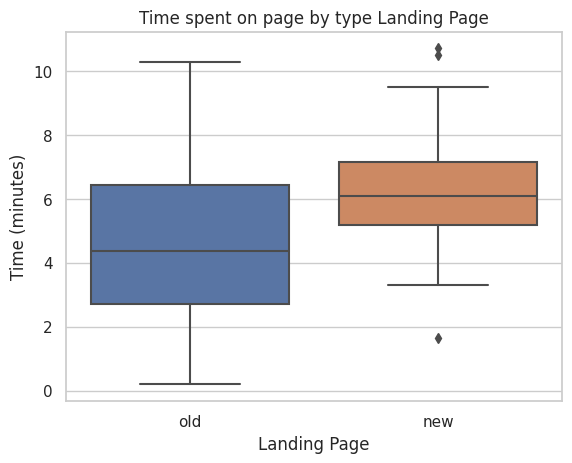

In [ ]:
#firstly, let's look once again at how much time is spent between landing pages
plt.title('Time spent on page by type Landing Page')

sns.boxplot(data=df, y ='time_spent_on_the_page',x = 'landing_page')
plt.xlabel('Landing Page')
plt.ylabel('Time (minutes)');

In [ ]:
mu_time = df.groupby('landing_page')['time_spent_on_the_page'].mean()
mu_time

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [ ]:
round(mu_time[0]-mu_time[1],2) #difference between means

1.69

At first glance, we can see that users on the new landing page spend more time on the page than on the old one. On average, they spend about 1.69 more minutes on the new page than the old one.

To test this, we'll perform a two-sample problem where we want to see whether there is enough statistical evidence that users spend more time in the new landing page.

Here, we'll be conducting a two-independent sample t-test, as the old and new landing page populations are different.Further, this is a one-tailed hypothesis
problem, concerning population means 𝛍1 and 𝛍2, the mean time spent on the new and old landing pages.


### Step 1: Define the null and alternate hypotheses

We can define the null and alternative hypotheses as follows:

>> H<sub>0</sub>: 𝛍<sub>1</sub> = 𝛍<sub>2</sub>

>> H<sub>A</sub>: 𝛍<sub>1</sub> < 𝛍<sub>2</sub>

Where 𝛍<sub>1</sub> is the mean time users spent in the old landing page and 𝛍<sub>2</sub> is the mean time users spent in the new landing page



### Step 2: Select Appropriate test

The appropriate test to use in this scenario is a _two independent sample t-test_. Here, we are testing for equality of means between the new and old landing page and have an unknown standard deviation.

### Step 3: Decide the significance level

In our case, we'll use the conventional confidence interval of 95%, which would translate to a significance level of 5% (𝛂 = 0.05).

### Step 4: Collect and prepare data

In [ ]:
df_landing = df[['landing_page','time_spent_on_the_page']].head(3)
df_landing

,landing_page,time_spent_on_the_page
0,old,3.48
1,new,7.13
2,new,4.40


In [ ]:
#we are creating a new dataframe based on whether these have the old or new landing page
df_old_page = df.loc[df['landing_page'] == 'old', 'time_spent_on_the_page']
df_new_page = df.loc[df['landing_page'] == 'new', 'time_spent_on_the_page']

print(df_old_page.shape)
print(df_new_page.shape)

(50,)
(50,)


In [ ]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the old landing page is ' + str(round(df_old_page.mean(),2)))
print('The mean time spent on the new landing page is ' + str(round(df_new_page.mean(),2)))
print('The standard deviation of the time spent on the old landing page is ' + str(round(df_old_page.std(), 2)))
print('The standard deviation of the time spent on the new landing page is ' + str(round(df_new_page.std(), 2)))

The mean time spent on the old landing page is 4.53
The mean time spent on the new landing page is 6.22
The standard deviation of the time spent on the old landing page is 2.58
The standard deviation of the time spent on the new landing page is 1.82


In [ ]:
#I'll create a function to test for normality
from scipy import stats

# Perform the Shapiro-Wilk test
def normality_test(data):
  statistic, p_value = stats.shapiro(data)

  # Print the results
  print(f"Shapiro-Wilk Test Statistic: {statistic}")
  print(f"P-value: {p_value}")

  # Interpret the results
  alpha = 0.05
  if p_value > alpha:
    print("Sample looks normally distributed (fail to reject H0)")
  else:
    print("Sample does not look normally distributed (reject H0)")

In [ ]:
normality_test(df_old_page)

Shapiro-Wilk Test Statistic: 0.9776089191436768
P-value: 0.45611920952796936
Sample looks normally distributed (fail to reject H0)


In [ ]:
normality_test(df_new_page)

Shapiro-Wilk Test Statistic: 0.9857664704322815
P-value: 0.8040016293525696
Sample looks normally distributed (fail to reject H0)


Now, we'll see whether the assumptions hold to conduct our statistical analysis:


* Continuous data - Yes, the time spent on the landing page is measured in a continous data.
* Normally distributed populations - Yes, we conducted the test to see this
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.



### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new_page, df_old_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

With a p-value of 0.000139 and a significance level of 0.05, we can reject the null hypothesis that they're equal.

### Step 7:  Draw inference

Thus, we can use the alternative hypothesis that the average time spent on the new landing page is greater than on the old landing page with a confidence level of 95%

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Our second insight we want to test is whether the conversion rate for the new page is greater than that of the old page. So let's first have a look at the data:

In [ ]:
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

In [ ]:
#now, looking at it as a proportion as follows:
df.groupby(['landing_page'])['converted'].value_counts(normalize = True)

landing_page  converted
new           yes          0.66
              no           0.34
old           no           0.58
              yes          0.42
Name: converted, dtype: float64

In [ ]:
# Group by 'landing_page' and 'converted', then calculate counts
counts = df.groupby(['landing_page', 'converted']).size().unstack()

# Normalize the table by rows
normalized_counts = counts.div(counts.sum(axis=1), axis=0)

# Print the normalized table
print(normalized_counts)

converted       no   yes
landing_page            
new           0.34  0.66
old           0.58  0.42


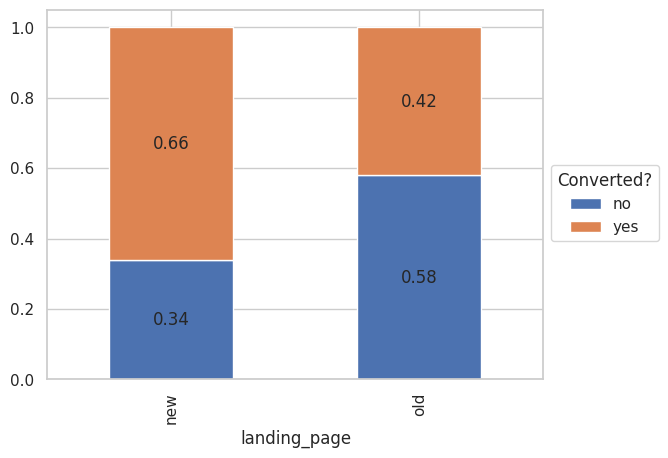

In [ ]:
df_proportion = normalized_counts.plot(kind='bar', stacked=True)

plt.legend(loc='upper left',  bbox_to_anchor=(1, .6), title = 'Converted?')

# Add data labels to the stacked bars
for container in df_proportion.containers:
    df_proportion.bar_label(container, label_type='center')

### Step 1: Define the null and alternate hypotheses

We can define the null and alternative hypotheses as follows:

>> H<sub>0</sub>: p<sub>1</sub> = p<sub>2</sub>

>> H<sub>A</sub>: p<sub>1</sub> < p<sub>2</sub>

Where p<sub>1</sub> is the proportion of users that converted with the old landing page and p<sub>2</sub> is the proportion of users that converted with the new landing page



### Step 2: Select Appropriate test

As part of our testing process, we want to evaluate statistical significance using a test of two proportions, concerning the proportion of users that convert using the old and new landing page respectively. We will do a **two-proportion Z-test**, which uses a standard normal distribution.

### Step 3: Decide the significance level

As with the previous test, we're using a level of significance of $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
#first, lets pull up our proportions that we previously calculated:
normalized_counts

converted,no,yes
landing_page,,
new,0.34,0.66
old,0.58,0.42


In [ ]:
#using our previously developed table, we'll proceed to extract the appropriate proportions
p_1 = normalized_counts.iloc[0,1]
print(p_1)

p_2 = normalized_counts.iloc[1,1]
print(p_2)


0.66
0.42


Before doing our statistical analysis, let's verify that the assumptions hold for our test:

*   Binomally distributed population - Yes, a either a user converts or doesn't
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  

*   Can the binomial distribution approximated to normal distribution - Yes. The standard thing is to check whether np and n(1-p) are greater than or equal to 10, as a rule of thumb. Here, n and p refer to the sample size and sample proportion respectively.

For the new landing page:
> np = 33

> n(1-p) = 17

For the old landing page:
> np = 21

> n(1-p) = 29


### Step 5: Calculate the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
conversion_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$ and inference

We can see that the p-value is 0.016, which is lower than our significance of 0.05. We can thus reject the null hypothesis the proportion of users that converted using the old and new landing page is the same. This supports our alternative hypothesis with a confidence level of 95% that the new landing page has a higher proportion of users that converted.

## 3. Is the conversion rate independent of the preferred language independent?

What I'm trying to look for here is whether conversion rate is dependent upon the preferred language a user of the news site prefers. In other words, are users who prefer a certain language more keen to convert?

In [ ]:
#let's look at the raw data
language_conversion = df.groupby(['converted'])['language_preferred'].value_counts().unstack(fill_value=0)
language_conversion

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


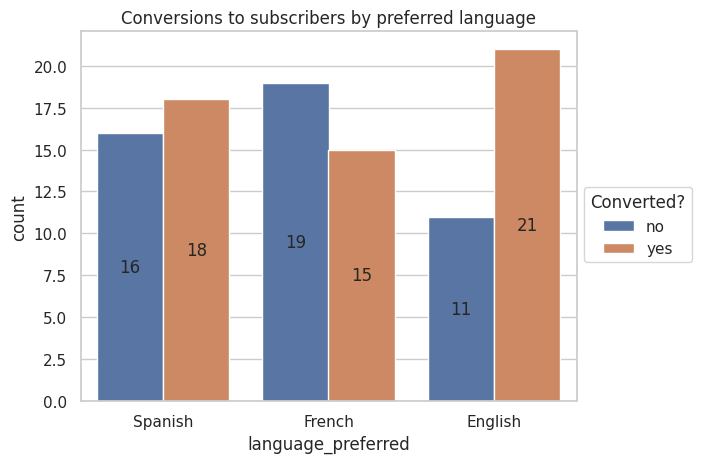

In [ ]:
plt.title('Conversions to subscribers by preferred language')
langugage_conversion_plot = sns.countplot(data = df, x = 'language_preferred', hue = 'converted', order = df['language_preferred'].value_counts().index)

# Add data labels to the stacked bars
for container in langugage_conversion_plot.containers:
    langugage_conversion_plot.bar_label(container, label_type='center')

plt.legend(loc='upper left',  bbox_to_anchor=(1, .6), title = 'Converted?');

### Step 1: Define the null and alternate hypotheses

We can define the null and alternative hypotheses as follows:

>> H<sub>0</sub>: The language preference of users is independent of their conversion rate

>> H<sub>A</sub>: The language preference of users is **not** independent of their conversion rate

### Step 2: Select Appropriate test

The appropriate test for this scenario is a Chi-Square test of independence, concerning the two independent categorical variables, user conversion and Language Preference. We will thus proceed to do a Chi-square test of independence to see whether this is the case

### Step 3: Decide the significance level

As aformentioned, we're looking at a significance level of alpha = 0.05

### Step 4: Collect and prepare data

In [ ]:
#once again, let's look at our data
language_conversion

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Now that these assumptions hold true, we'll proceed to do our statistical analysis

### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(language_conversion)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$ and inference

With our significance level of 0.05, we noticed that our p-value is 0.21. Given this, we cannot reject our null-hypothesis that the language preference is independent of the user conversion.

## 4. Is the time spent on the new page same for the different language users?

Finally, let's analyze one more scenario. Here's we want to look at whether the time spent in the new page is the same across language preferences. In other words, is the average time spent on the new landing page the same across language preferences?

### Step 1: Define the null and alternate hypotheses

This problem appears to be a problem of analysis of variance (ANOVA), by which we want to determine whether the means of more than two independent populations are significantly different. Here, is the average time spent on the new landing page statistically the same across language preferences?

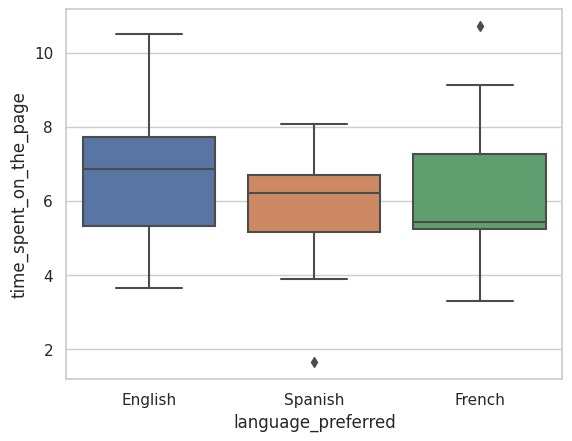

In [ ]:
#let us first look at the data and what we're dealing with:
df_new_page =  df[df['landing_page'] == 'new'] #filter dataframe to only include the new landing page

sns.boxplot(data = df_new_page, x = 'language_preferred', y = 'time_spent_on_the_page');

In [ ]:
#let's look at the mean time spent on the new landing page
df_new_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

We can define the null and alternative hypotheses as follows:

>> H<sub>0</sub>: 𝛍<sub>English</sub> = 𝛍<sub>Spanish</sub> = 𝛍<sub>French</sub>

>> H<sub>A</sub>: At least one of these means is not the same

Where 𝛍<sub>English</sub> refers to the average time spent in the new landing page for users who prefer using English as their language, and respectively for 𝛍<sub>Spanish</sub> and 𝛍<sub>French</sub>

### Step 2: Select Appropriate test

We will use the One-way ANOVA F-test to see whether the mean time spent on the new landing page differs across language preferences.

### Step 3: Decide the significance level

The level of significance is alpha = 0.05

### Step 4: Collect and prepare data

In [ ]:
#let us look at our data as follows:
df_new_page_sub = df_new_page[['language_preferred','time_spent_on_the_page']]
df_new_page_sub.head()

,language_preferred,time_spent_on_the_page
1,English,7.13
2,Spanish,4.40
4,Spanish,4.75
6,French,5.25
8,French,10.71


Before we proceed to do our ANOVA test, we need to verify a few assumptions. Specifically, the normality and equality of variance assumptions need to be checked.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution against

>$H_a:$ Time spent on the page does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new_page_sub['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large (greater than 0.05), we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(df_new_page_sub['time_spent_on_the_page'][df_new_page_sub['language_preferred']=="English"],
                                   df_new_page_sub['time_spent_on_the_page'][df_new_page_sub['language_preferred']=="Spanish"],
                                   df_new_page_sub['time_spent_on_the_page'][df_new_page_sub['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large (greater than 0.05), we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Step 5: Calculate the p-value

In [ ]:
#with these assumptions holding, we will proceed to calculate our p-value as follows:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new_page_sub['time_spent_on_the_page'][df_new_page_sub['language_preferred']=="English"],
                                   df_new_page_sub['time_spent_on_the_page'][df_new_page_sub['language_preferred']=="Spanish"],
                                   df_new_page_sub['time_spent_on_the_page'][df_new_page_sub['language_preferred']=="French"])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$ and inference

Since our p-value is greater than 0.05, we cannot reject the hypothesis that the sample mean time spent on the new landing page across language preference differs from one another. There is not enough statistical evidence to reject this hypothesis.

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_new_page_sub['time_spent_on_the_page'], groups = df_new_page_sub['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7434 -2.0035  1.069  False
English Spanish  -0.8285 0.3995 -2.3647 0.7078  False
 French Spanish  -0.3612 0.8326  -1.874 1.1516  False
-----------------------------------------------------


## Conclusion and Business Recommendations

Overall, we looked at several hypothesis and utilized statistical analyses to test these. Instead of just visualizing the data, we put them to the test to make more data-driven decisions. It's imperative to note that this is not entirely conclusive, but there is strong evidence in favor of these.



*   We first saw that users spend more time in the new landing page as opposed to the old one
*   The conversion rate of users was greater in the new landing page than the old one
*   There was not enough statistical evidence to suggest that languange preference across the landing page led to more conversions, and finally
*   We didn't have enough statistical evidence to suggest that users with different language preference spent more time on the new landing page.

With this in mind, we would recommend E-news to switch to the new landing page. There appears to be no difference across language and overall we see a net benefit of switching to the new landing page format. We see about an 8% increase in conversions (66% - 58%) in conversions between the old and new page.

It is important to note that this suggestion comes with caveats. It would be important to be able to increase the sample size and timeframe to see whether this comes with a prolonged impact. Nevertheless, with the information avaialable, this would be the best course of action.



___